# Trans* Twitter Data Analysis
Project by Lucien Mensah

## Webpage: https://lucienmensah.github.io/blogpages/2021_11_18_post.html

### Project Goals:
The goal of this project is to explore how Twitter users use language and neologisms to express gender freedom. Some of the questions that I would like to hopefully answer are: 

#### Is there an alignment between the pronouns that people use to describe themselves and the words that they use?
#### Do those that use pronoun sets outside of "he/him" and "she/her" tend to create more words to fit their identities?
#### What is the general sentiment of these neologisms with specific reference to those who may be outside the gender binary?
#### How often do people use neologisms to talk about themselves vs others?

### Some smaller questions that I also would like to look at:

##### How many Twitter users do actually put their pronouns in their bios/location?
##### Is it more common to put pronouns in their bio or their location?

### Data Pulling Code:

I pull this data using Tweepy, a Python library designed specifically for interacting with Twitter. It also requires that I have Twitter Dev Access, which is something that I acquired a while ago. I start off by importing the necessary libraries - in addition to Tweepy, I need re for my regex, pandas to read the CSVs and matplotlib for visualizations.

In [1]:
import tweepy
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

After that, it is necessary to be authenticated through Twitter, and I have hidden my keys.

In [3]:
consumer_key = "####"
consumer_secret = "####"
access_token = "####"
access_token_secret = "####"

# creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# creating the API object while passing in auth information
api = tweepy.API(auth)

I set up the list of features that I will be looking for to create my dataframe, I have a list of the queries I will be searching for, and I have a dictionary that will make the process easier for looping through.

In [4]:
user_features_list = ["screen_name", "name", "location", "bio", "tweet",
                      "he/him", "she/her", "they/them",
                      "it/its", "xe/xem", "ze/zir"]

query_list = ["thembo","bimbo","himbo","theydies","ladies", "gentlethem", "gentlemen", "theybie", "transgender","trans woman","trans man"]
res_dict = {}

I am focusing on neologisms in English, so I set my language to English. The max number of tweets I can pull per query is 100 terms, so I set that, and then I begin a loop to search for tweets that are in my query, match the language, and match the number of tweets. I should note that with the labels "transwoman" and "transman", it is specifically spaced out in my code, but it still captures instances of "transwoman" and "transman", which is specifically marked as okay as a self-identifier but there has been discourse about which version is politically correct. My viewpoint is that one should separate the two, as "trans" is an adjective modifying "man" in the same way that "cis" is oftentime (silently) modifying man or woman. Putting the adjective and noun together may often be seen as a form of othering to differenciate a trans person from a cis person purposefully to deny their womanhood or manhood.

In [ ]:
# english language tweets
language = "en"
# can set number of tweets to pull - up to 100
numTweets = 100
# calling the user_timeline function with our parameters
for query in query_list:
    res_dict[query] = api.search_tweets(q=query, lang=language, count=numTweets)

My code to search through tweets uses regex to search through a user's bio and location to see what set of pronouns they use. Right now, I am only looking for he/him, they/them, she/her, it/its, xe/xir/xem, ze/zir/zem in regards to pronouns since those are the sets that I have come across the most. As I encounter new sets of pronouns, I do my best to add them to this list. This code could also possibly use some refinement as it may make more sense to make each of the pronouns into a list and then do regex from there. All the pronouns are appended to their respective lists, and then I also have a specific list for users that do not have pronouns in their bio. From there, I am able to reference the previously created list to compile the dataframe since users that have at least one instance of a pronoun will be captured, and if a specific user uses multiple sets of pronouns, the dataframe will mark each of these. This allows for a variety of pronouns and possibly identities to be captured.

In [ ]:
# cell to search through tweets
for query in query_list:   
    users_df = pd.DataFrame(columns = user_features_list)
    pro_they = []
    pro_he = []
    pro_she = []
    pro_it = []
    pro_xe = []
    pro_ze = []
    no_pronouns = []
    authors = []
# no pronouns, but uses nb or genderqueer
    nbgq = []
    tweets = []
    for tweet in res_dict[query]: #there has to be a way to make this less redundant
        # prints the username, tweet w query, and bio description
        tweets.append(tweet.text)
        # print(tweet.user.screen_name,"Tweeted:",tweet.text,"| User Description:",tweet.user.description)
        authors.append(tweet.user.screen_name)
        # this searches for they/them
        if re.search((r'\bthey\b' or r'\bthem\b'), tweet.user.description, re.IGNORECASE):
            pro_they.append(tweet.user.screen_name) #searches for they/them
        if re.search((r'\bthey\b' or r'\bthem\b'), tweet.user.location, re.IGNORECASE):
            pro_they.append(tweet.user.screen_name) #searches for they/them
        if re.search((r'\bshe\b' or r'\bher\b'), tweet.user.description, re.IGNORECASE):
            pro_she.append(tweet.user.screen_name)
        if re.search((r'\bshe\b' or r'\bher\b'), tweet.user.location, re.IGNORECASE):
            pro_she.append(tweet.user.screen_name)
        if re.search((r'\bhe\b' or r'\bhim\b'), tweet.user.description, re.IGNORECASE):
            pro_he.append(tweet.user.screen_name)
        if re.search((r'\bhe\b' or r'\bhim\b'), tweet.user.location, re.IGNORECASE):
            pro_he.append(tweet.user.screen_name)
        if re.search((r'\bit\b' or r'\bits\b'), tweet.user.description, re.IGNORECASE):
            pro_it.append(tweet.user.screen_name)
        if re.search((r'\bit\b' or r'\bits\b'), tweet.user.location, re.IGNORECASE):
            pro_it.append(tweet.user.screen_name)
        if re.search((r'\bxe\b' or r'\bxir\b' or r'\bxem\b' or r'\bxey\b'), tweet.user.description, re.IGNORECASE):
            pro_xe.append(tweet.user.screen_name)
        if re.search((r'\bxe\b' or r'\bxir\b' or r'\bxem\b' or r'\bxey\b'), tweet.user.location, re.IGNORECASE):
            pro_xe.append(tweet.user.screen_name)
        if re.search((r'\bze\b' or r'\bzir\b' or r'\bzem\b'), tweet.user.description, re.IGNORECASE):
            pro_ze.append(tweet.user.screen_name)
        if re.search((r'\bze\b' or r'\bzir\b' or r'\bzem\b'), tweet.user.location, re.IGNORECASE):
            pro_ze.append(tweet.user.screen_name)
            #de,dem
   #people who use words like genderqueer, nb
        if re.search((r'\bnonbinary\b' or r'\bgenderqueer\b'), tweet.user.description, re.IGNORECASE):
           nbgq.append(tweet.user.screen_name)
           
    for tweet in res_dict[query]: #this may not be necessary    
    # Create empty dict
        user_features = {}
    # Get user data
        user_features['bio'] = tweet.user.description
        user_features['screen_name'] = tweet.user.screen_name
        user_features['name'] = tweet.user.name
        user_features['tweet'] = tweet.text
        user_features['location'] = tweet.user.location
        #fills in the yeses
        if tweet.user.screen_name in pro_they:
            user_features['they/them'] = 'yes'
        if tweet.user.screen_name in pro_he:
            user_features['he/him'] = 'yes'
        if tweet.user.screen_name in pro_she:
            user_features['she/her'] = 'yes'
        if tweet.user.screen_name in pro_it:
            user_features['it/its'] = 'yes'
        if tweet.user.screen_name in pro_xe:
            user_features['xe/xem'] = 'yes'
        if tweet.user.screen_name in pro_ze:
            user_features['ze/zem'] = 'yes'
        #fills in the nos
        if tweet.user.screen_name not in pro_he:
            user_features['he/him'] = 'no'
        if tweet.user.screen_name not in pro_she:
            user_features['she/her'] = 'no'
        if tweet.user.screen_name not in pro_xe:
            user_features['xe/xem'] = 'no'
        if tweet.user.screen_name not in pro_they:
            user_features['they/them'] = 'no'
        if tweet.user.screen_name not in pro_it:
            user_features['it/its'] = 'no'
        if tweet.user.screen_name not in pro_ze:
            user_features['ze/zem'] = 'no'
        # concat the dfs
        user = pd.DataFrame(user_features, index = [0])
        users_df = pd.concat([users_df, user], ignore_index = True)
    date_string = '11_18'
    filename = '%s_%s.csv' % (query, date_string)   
    users_df.to_csv(filename, encoding='utf-8', index=False)

### Data Examination:
I will be pulling data from Twitter every other day, from a query of the words: "thembo", "bimbo", "himbo", "theydies", "ladies", "gentlethem", "gentlemen", "theybie", "transgender", "transwoman", and "transman". Each of these terms will be pulled in, and will be in their own csv file. An example of one of the datasets is available below:

In [5]:
thembo_df = pd.read_csv("thembo_10_24.csv")
thembo_df.head()

,screen_name,name,location,bio,tweet,he/him,she/her,they/them,it/its,xe/xem,ze/zir
0,Dr_Thembo,Dr Thembo 🏴,NaN,They/Thembo,"@gaywonk I like ""CRT, God Dammit"" more, bit ""T...",no,no,yes,no,no,no
1,Thembo_OW,Thembo OW :),NaN,Hi im hunter I play OwOverwatch:) \nThey/them,RT @Twobold_: A child shows me a 'meme' consis...,no,no,yes,no,no,no
2,Thembo_OW,Thembo OW :),NaN,Hi im hunter I play OwOverwatch:) \nThey/them,RT @chrissyxchi: does changing the Overwatch c...,no,no,yes,no,no,no
3,ArtinandWritin,✨⍣ʟᴀ ᴊᴇss⍣✨💉,NaN,She/Her | 19 | I am no longer baby I want powe...,RT @ThistleSpade: thembo i mean- tk redesign &...,no,yes,no,no,no,no
4,RedRiotsDarling,SorchaChaos🌸 Feeling Petty in Pink,NaN,"30. She/They, Disaster Bisexual. This close to...",@KTGWrites 🎶 This thembo's on fiiiiiire 🎶 But ...,no,yes,yes,no,no,no


As we can see from the preview of the data, we get a user's screen_name (user name), their name (display name), location (the reason why it is included is because some users put their pronouns in their location), bio (the most popular place to put pronouns), the tweet that had the word that was queried, which in this case was "thembo", and columns that specifically denote what set of pronouns were indicated either in their bio or location. I used regular expressions specifically searching for different pronoun sets in order to create the columns that indicated what pronouns they used. I figured this would be the most benefiticial while doing the data analysis. One issue with the data is that the Twitter indiscriminately will include users that may not specifically Tweeted a certain word, but also has it in their bio or their screen name, as we see for the first person. I, however, have not removed them from my analysis because those users show example of using one of the gendered neologisms as a self-identification, which is the main point of my research. Additionally, the main reason I am using pronouns is because they are another hallmark of self identification, though, while dealing with the different words in the queries, we will be interacting with the societal implications that each word has. For example, "bimbo" being aligned with women, "himbo" with men, and "thembo" being created to align with non-binary people. There is a fine line with this research as someone may be non-binary but not use they/them pronouns or vise-versa. That is why I will be trying to stray away from making such specific alignments, but we do live in an overarching cis-centric society. 

### Data Analysis
The next step is to compile the created dataframes together throughout the dates that have been collected. In order to make my findings statistically significant, I have about 1,000 tweets per query, which is all Tweeters - those who don't have pronouns in their bios and those that do. Reminder that I have 11 queries, which puts us at 11,000 data points. Wow! Since I want to look specifically at users with pronouns in their bios, that will likely remove about half of the data, but before we do that, we can answer one of my questions by looking at the number of people who have pronouns in their bios compared to those who don't. 

In [20]:
trans_fn_list = ["4_18/transgender_4_18.csv", "4_19/transgender_4_19.csv", "4_20/transgender_4_20.csv", "4_21/transgender_4_21.csv", "4_22/transgender_4_22.csv", "4_24/transgender_4_24.csv", "11_2/transgender_11_2.csv", "11_4/transgender_11_4.csv", "11_9/transgender_11_9.csv", "11_18/transgender_11_18.csv"]
trans_df_list = [pd.read_csv(fn) for fn in trans_fn_list]
transgender_df = pd.concat(trans_df_list).reset_index(drop=True)

In [22]:
# creating a column that tracks if users have pronouns or not
transgender_df['pronouns'] = ['no' if x >= 6 else 'yes' for x in np.sum(transgender_df.values == 'no', 1)]

In [23]:
transgender_df.head(15)

,screen_name,name,location,bio,tweet,he/him,she/her,they/them,it/its,xe/xem,ze/zir,ze/zem,pronouns
0,jallyrancherr,Baby J (she/they/them),23. NJ. Virgo. Activist. Bi.,i never know wtf I’m doing but we out here doi...,RT @StevenCanals: Heartbreaking. We have to pr...,no,yes,yes,no,no,no,NaN,yes
1,bellamackie,Bella Mackie,London,"Writer, anxious. Podcast - Teach Me A Lesson. ...",RT @ObsNewReview: ‘Being trans is not somethin...,no,no,no,no,no,no,NaN,no
2,MerrylWiener,Merryl Wiener,queens,"Theatre, film and music aficionado.",RT @NikSense8: ‘Being trans is not something y...,no,no,no,no,no,no,NaN,no
3,LexianBut,🥓 Alchemic Pragon Lexian! ⚗️✨,Denny’s,Puma-Dragon Hybrid | 20 |🦀 I love my boyfriend...,RT @EdieGuardian: To supplement the previous p...,no,no,no,no,no,no,NaN,no
4,tediumnnc,T.D.M.,N. Carolina,"Used to be a lot of things, now just watching ...",So much here...\r\n\r\nhttps://t.co/tT18x9HCZV,no,no,no,no,no,no,NaN,no
5,womenalsoknow,womenalsoknowstuff,NaN,#WomenAlsoKnowStuff -- you should ask them abo...,"In Sports Illustrated, @britnidlc's article fe...",no,no,no,yes,no,no,NaN,yes
6,DIGI_83exe,DIGI_83.exe,Liminal Space,"He,Him/ANTIFA/BLM/Atheist/High Functioning Aut...",Reblog if you’d be okay if your friend came ou...,yes,no,no,no,no,no,NaN,yes
7,IllisiaAdams,Illisia Adams,Margate,"Streamer, voice artist, Blogger, egalitarian, ...",I truly look-forward to the day when a film/TV...,no,no,no,no,no,no,NaN,no
8,swiftyloo,HannaKat,TX,Never put off till tomorrow that which you can...,RT @jackmurphylive: A source inside DOJ sent m...,no,no,no,no,no,no,NaN,no
9,bacchusrights,rory🟨🟥,mcr / nw region,"ceramics MA student • infj, bpd haver™️, cish...",RT @OwenJones84: So heartening to read somethi...,yes,no,no,no,no,no,NaN,yes


no     0.701232
yes    0.298768
Name: pronouns, dtype: float64


<AxesSubplot:>

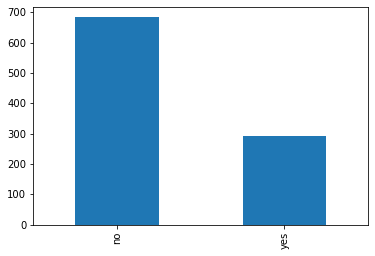

In [24]:
print(transgender_df['pronouns'].value_counts()/transgender_df['pronouns'].value_counts().sum())
transgender_df['pronouns'].value_counts().plot.bar()

Seeing that most people don't use pronouns in their bio for tweeting a word as general as "transgender" is not surprising. What would be interesting to look at is if there is the same thing with different groups. "Transgender" would be the control and "trans man" and "trans woman" would be my differing variable. Let's compile these dataframes, add a pronouns column, and then visualize this distribution.

In [2]:
transman_fn_list = ["4_18/transman_4_18.csv", "4_19/transman_4_19.csv", "4_20/transman_4_20.csv", "4_21/transman_4_21.csv", "4_22/transman_4_22.csv", "4_24/transman_4_24.csv", "11_2/transman_11_2.csv", "11_4/transman_11_4.csv", "11_9/transman_11_9.csv", "11_18/transman_11_18.csv"]
transman_df_list = [pd.read_csv(fn) for fn in transman_fn_list]
transman_df = pd.concat(transman_df_list).reset_index(drop=True)
transman_df = transman_df.drop(['ze/zem'], 1)

transman_df['pronouns'] = ['no' if x >= 6 else 'yes' for x in np.sum(transman_df.values == 'no', 1)]
transman_df.head()

C:\Users\lucie\AppData\Local\Temp/ipykernel_83388/329965927.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  transman_df = transman_df.drop(['ze/zem'], 1)


,screen_name,name,location,bio,tweet,he/him,she/her,they/them,it/its,xe/xem,ze/zir,pronouns
0,InkWolf14,Ink,She/Her,15 | I draw a lot! | guys please\r\n\r\nopen t...,"RT @jalle_nii: #TransDayOfVisibility \r\nHiya,...",no,yes,no,no,no,no,yes
1,ElleBeeG,ElleBeeG,"Scotland, United Kingdom",Adult Human Female - no debate.,@SinclairJM1987 @owenjones84 is a transphobic ...,no,no,no,no,no,no,no
2,Jonman927,Jon is |REDACTED|,"Twinleaf, Sinnoh",|REDACTED|,RT @ArtsySmoker: My name is Bailey! I am a 29 ...,no,no,no,no,no,no,no
3,JenJunoJ,Juno,"Alaska, USA",I wear men's clothing. Here's hoping men don't...,"@hatpinwoman &lt;-this transman likes dick, th...",no,no,no,yes,no,no,yes
4,efan78,Ethan Kristopher-Hartley 🏳️‍🌈🇬🇧🇪🇺,"Newcastle upon Tyne, UK","42 yo Centre-Left, Liberal Progressive, Remain...",@fiery_godmother @lisasmi13049966 @DanauraW @S...,yes,no,no,no,no,no,yes


no     0.613475
yes    0.386525
Name: pronouns, dtype: float64


<AxesSubplot:>

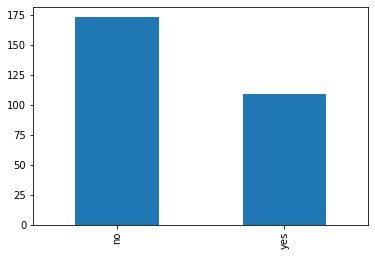

In [3]:
print(transman_df['pronouns'].value_counts()/transman_df['pronouns'].value_counts().sum())
transman_df['pronouns'].value_counts().plot.bar()

In [4]:
transwoman_fn_list = ["4_18/transwoman_4_18.csv", "4_19/transwoman_4_19.csv", "4_20/transwoman_4_20.csv", "4_21/transwoman_4_21.csv", "4_22/transwoman_4_22.csv", "4_24/transwoman_4_24.csv", "11_2/transwoman_11_2.csv", "11_4/transwoman_11_4.csv", "11_9/transwoman_11_9.csv", "11_18/transwoman_11_18.csv"]
transwoman_df_list = [pd.read_csv(fn) for fn in transwoman_fn_list]
transwoman_df = pd.concat(transwoman_df_list).reset_index(drop=True)
transwoman_df = transwoman_df.drop(['ze/zem'], 1)

transwoman_df['pronouns'] = ['no' if x >= 6 else 'yes' for x in np.sum(transwoman_df.values == 'no', 1)]
transwoman_df.head()

C:\Users\lucie\AppData\Local\Temp/ipykernel_83388/1132476363.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  transwoman_df = transwoman_df.drop(['ze/zem'], 1)


,screen_name,name,location,bio,tweet,he/him,she/her,they/them,it/its,xe/xem,ze/zir,pronouns
0,CherriBakewel,CEO of The Bimbo Industrial Complex,She/Her,local gay,A couple of months on and I still can't accept...,no,yes,no,no,no,no,yes
1,yanlina77479579,Martin,NaN,NaN,RT @May10208093: Women are valued in all socie...,no,no,no,no,no,no,no
2,1610_SpiderBoi,Miles Morales™ ( Semi-Hiatus ),"Brooklyn, NY ( Earth - 1610 )",""" I may be a short hero , but I do have a big ...","RT @p00leparty: //Alright, since I recently hi...",no,no,no,no,no,no,no
3,uhdeemah,nek unek,atl • 22,open to criticism •blk liberation• tryna be be...,RT @cocoszengarden: SAVE A TRANSWOMAN OF COLOR...,no,no,no,no,no,no,no
4,loco_2017,cachorro loco 2017,NaN,DE BEM COM A VIDA.,RT @Love4Trans: #TransIsBeautiful 🦋\r\n\r\nBea...,no,no,no,no,no,no,no


no     0.761844
yes    0.238156
Name: pronouns, dtype: float64


<AxesSubplot:>

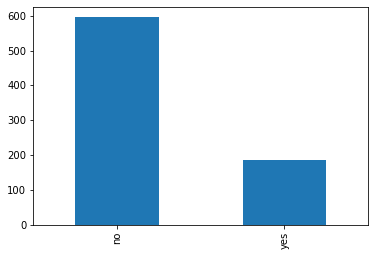

In [5]:
print(transwoman_df['pronouns'].value_counts()/transwoman_df['pronouns'].value_counts().sum())
transwoman_df['pronouns'].value_counts().plot.bar()

So, we see significantly less tweets in "trans man" than "trans woman" and "transgender", BUT the amount of people using pronouns is not that different than those terms. It would likely be helpful to look at the porpotional differences between them. However, removing people who don't have pronouns would lessen our dataset by more than half, but I still believe my findings would be statistically significant. Let's take a look at the other terms. 

*** one edit for later is to make these on the same chart ***

no     0.633779
yes    0.366221
Name: pronouns, dtype: float64


<AxesSubplot:>

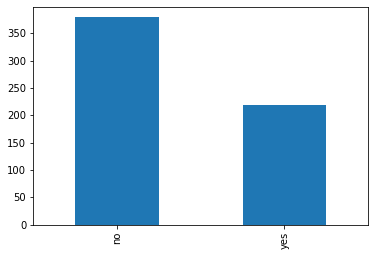

In [6]:
bimbo_fn_list = ["4_18/bimbo_4_18.csv", "4_19/bimbo_4_19.csv", "4_20/bimbo_4_20.csv", "4_21/bimbo_4_21.csv", "4_22/bimbo_4_22.csv", "4_24/bimbo_4_24.csv", "11_2/bimbo_11_2.csv", "11_4/bimbo_11_4.csv", "11_9/bimbo_11_9.csv", "11_18/bimbo_11_18.csv"]
bimbo_df_list = [pd.read_csv(fn) for fn in bimbo_fn_list]
bimbo_df = pd.concat(bimbo_df_list).reset_index(drop=True)

bimbo_df['pronouns'] = ['no' if x >= 6 else 'yes' for x in np.sum(bimbo_df.values == 'no', 1)]
print(bimbo_df['pronouns'].value_counts()/bimbo_df['pronouns'].value_counts().sum())
bimbo_df['pronouns'].value_counts().plot.bar()

yes    0.624726
no     0.375274
Name: pronouns, dtype: float64


<AxesSubplot:>

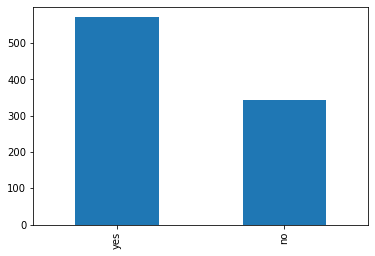

In [7]:
himbo_fn_list = ["4_18/himbo_4_18.csv", "4_19/himbo_4_19.csv", "4_20/himbo_4_20.csv", "4_21/himbo_4_21.csv", "4_22/himbo_4_22.csv", "4_24/himbo_4_24.csv", "11_2/himbo_11_2.csv", "11_4/himbo_11_4.csv", "11_9/himbo_11_9.csv", "11_18/himbo_11_18.csv"]
himbo_df_list = [pd.read_csv(fn) for fn in himbo_fn_list]
himbo_df = pd.concat(himbo_df_list).reset_index(drop=True)

himbo_df['pronouns'] = ['no' if x >= 6 else 'yes' for x in np.sum(himbo_df.values == 'no', 1)]
print(himbo_df['pronouns'].value_counts()/himbo_df['pronouns'].value_counts().sum())
himbo_df['pronouns'].value_counts().plot.bar()

#### Whoa! More people have pronouns in their bio when they use the word himbo! Let's pause here and look at the distribution on their pronouns!

In [8]:
himbo_pronouns_df = himbo_df[himbo_df['pronouns'] == 'yes'].reset_index(drop=True)

In [9]:
himbo_pronouns_df.head()

,screen_name,name,location,bio,tweet,he/him,she/her,they/them,it/its,xe/xem,ze/zir,ze/zem,pronouns
0,twinkjoon,jj loves bexie forever!!!!,"bun/they, 21, minors dni",jungkook please smoke a blunt w me im begging ...,RT @aglioeollieo: 🐨 Welcome to Himbo Hooters! ...,no,no,yes,no,no,no,NaN,yes
1,caprimoment,Capri | Caprijima Arc,“joslyn” - joslyn | minor,professional akira nishikiyama lover | she/they,Yakuza Kiwami 2 spoilers //\r\n\r\ngoth himbo ...,no,yes,yes,no,no,no,NaN,yes
2,Brycifer666,Brycifer,Earth 616,He/Him *BiPrideFlag*\r\n@brycifer666 on insta ...,@TimeAndSpace_42 He is the best Tiger Himbo,yes,no,no,no,no,no,NaN,yes
3,starplatinumnun,🕷nun🕷,she/her,disaster artist(?)\r\ni'm still a jojo stan i ...,@diavologirlboss no lesbian himbo solidarity? ...,no,yes,no,no,no,no,NaN,yes
4,ragunyans,nat 🌻🌹 @ always sobbing 👑,"Tennessee, USA",She/Her | 26 | ISTJ | Black | #BLM !!\r\n\r\nM...,RT @EarlCrayTea: IDEAL BIMBO HIMBO RELATIONSHI...,no,yes,no,no,no,no,NaN,yes


In [10]:
himbo_pronouns_df[['he/him','she/her','they/them','it/its','xe/xem','ze/zir']].value_counts()

he/him  she/her  they/them  it/its  xe/xem  ze/zir
yes     no       no         no      no      no        177
no      yes      no         no      no      no        163
        no       yes        no      no      no         71
        yes      yes        no      no      no         55
yes     no       yes        no      no      no         55
no      no       no         yes     no      no         15
yes     no       no         yes     no      no          8
no      yes      no         yes     no      no          6
yes     no       yes        yes     no      no          6
        yes      no         no      no      no          4
                 yes        no      no      no          3
no      no       yes        yes     no      no          2
                            no      yes     no          1
        yes      yes        yes     no      no          1
yes     yes      no         no      yes     no          1
dtype: int64

Heyyyy! This is kind of proving my hypothesis, that people's pronouns do kind of align with the word that they use, since himbo has the 'him' suffix, the assumption is that we would expect more he/him users, and that's true! At least, so far. Additionally, I like this distribution of the value counts because it also visualizes people with more than one set of pronouns. I am open to more visualizations that may also show the distribution of pronouns (maybe a pie graph?) Let's do this same thing for thembo and bimbo.

yes    0.714885
no     0.285115
Name: pronouns, dtype: float64


<AxesSubplot:>

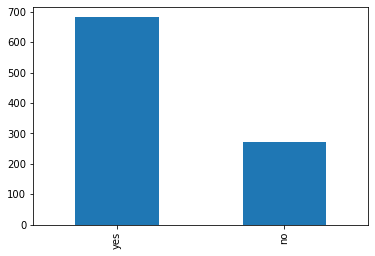

In [11]:
thembo_fn_list = ["4_18/thembo_4_18.csv", "4_19/thembo_4_19.csv", "4_20/thembo_4_20.csv", "4_21/thembo_4_21.csv", "4_22/thembo_4_22.csv", "4_24/thembo_4_24.csv", "11_2/thembo_11_2.csv", "11_4/thembo_11_4.csv", "11_9/thembo_11_9.csv", "11_18/thembo_11_18.csv"]
thembo_df_list = [pd.read_csv(fn) for fn in thembo_fn_list]
thembo_df = pd.concat(thembo_df_list).reset_index(drop=True)

thembo_df['pronouns'] = ['no' if x >= 6 else 'yes' for x in np.sum(thembo_df.values == 'no', 1)]
print(thembo_df['pronouns'].value_counts()/thembo_df['pronouns'].value_counts().sum())
thembo_df['pronouns'].value_counts().plot.bar()

In [12]:
thembo_pronouns_df = thembo_df[thembo_df['pronouns'] == 'yes'].reset_index(drop=True)
thembo_pronouns_df[['he/him','she/her','they/them','it/its','xe/xem','ze/zir']].value_counts()

he/him  she/her  they/them  it/its  xe/xem  ze/zir
no      no       yes        no      no      no        254
yes     no       yes        no      no      no        192
no      yes      yes        no      no      no         56
yes     no       no         no      no      no         53
no      yes      no         no      no      no         50
        no       yes        yes     no      no         40
                 no         yes     no      no         11
yes     yes      yes        no      no      no          8
no      yes      no         yes     no      no          4
yes     no       no         no      yes     no          4
no      yes      yes        yes     no      no          3
yes     no       no         yes     no      no          3
        yes      no         no      no      no          2
no      no       yes        no      yes     no          1
yes     no       yes        no      yes     no          1
dtype: int64

Omg... and we see the same thing for they/them and thembo. Most of the people tweeting that word do also use they/them or a combination of another pronoun set with they.

In [13]:
bimbo_pronouns_df = bimbo_df[bimbo_df['pronouns'] == 'yes'].reset_index(drop=True)
bimbo_pronouns_df[['he/him','she/her','they/them','it/its','xe/xem','ze/zir']].value_counts()

he/him  she/her  they/them  it/its  xe/xem  ze/zir
no      yes      no         no      no      no        77
        no       yes        no      no      no        30
        yes      yes        no      no      no        29
yes     no       yes        no      no      no        24
                 no         no      no      no        22
no      no       no         yes     no      no        18
                 yes        yes     no      no         4
        yes      no         yes     no      no         4
                 yes        yes     no      no         4
yes     yes      yes        no      no      no         3
        no       no         yes     no      no         1
        yes      no         no      no      no         1
                 yes        no      yes     no         1
dtype: int64

Whoa... So far, there is an alignment between the pronouns and the suffix/societal implications that a word has. Now, the deeper question is whether this is being used to talk about themselves or a group that they are a part of, or whether this is being used to talk about other people. But for now, this is pretty significant. Now, let's go ahead and see if we find the same kind of thing for the other queried words. 

yes    0.663727
no     0.336273
Name: pronouns, dtype: float64


<AxesSubplot:>

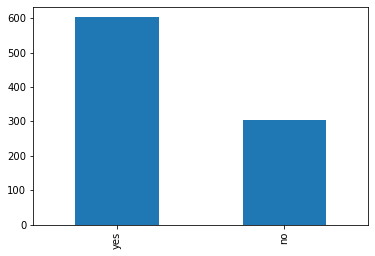

In [14]:
gentlethem_fn_list = ["4_18/gentlethem_4_18.csv", "4_19/gentlethem_4_19.csv", "4_20/gentlethem_4_20.csv", "4_21/gentlethem_4_21.csv", "4_22/gentlethem_4_22.csv", "4_24/gentlethem_4_24.csv", "11_2/gentlethem_11_2.csv", "11_4/gentlethem_11_4.csv", "11_9/gentlethem_11_9.csv", "11_18/gentlethem_11_18.csv"]
gentlethem_df_list = [pd.read_csv(fn) for fn in gentlethem_fn_list]
gentlethem_df = pd.concat(gentlethem_df_list).reset_index(drop=True)

gentlethem_df['pronouns'] = ['no' if x >= 6 else 'yes' for x in np.sum(gentlethem_df.values == 'no', 1)]
print(gentlethem_df['pronouns'].value_counts()/gentlethem_df['pronouns'].value_counts().sum())
gentlethem_df['pronouns'].value_counts().plot.bar()

no     0.847
yes    0.153
Name: pronouns, dtype: float64


<AxesSubplot:>

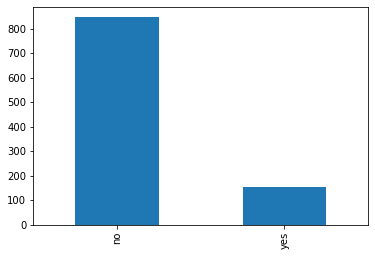

In [15]:
gentlemen_fn_list = ["4_18/gentlemen_4_18.csv", "4_19/gentlemen_4_19.csv", "4_20/gentlemen_4_20.csv", "4_21/gentlemen_4_21.csv", "4_22/gentlemen_4_22.csv", "4_24/gentlemen_4_24.csv", "11_2/gentlemen_11_2.csv", "11_4/gentlemen_11_4.csv", "11_9/gentlemen_11_9.csv", "11_18/gentlemen_11_18.csv"]
gentlemen_df_list = [pd.read_csv(fn) for fn in gentlemen_fn_list]
gentlemen_df = pd.concat(gentlemen_df_list).reset_index(drop=True)

gentlemen_df['pronouns'] = ['no' if x >= 6 else 'yes' for x in np.sum(gentlemen_df.values == 'no', 1)]
print(gentlemen_df['pronouns'].value_counts()/gentlemen_df['pronouns'].value_counts().sum())
gentlemen_df['pronouns'].value_counts().plot.bar()

yes    0.590414
no     0.409586
Name: pronouns, dtype: float64


<AxesSubplot:>

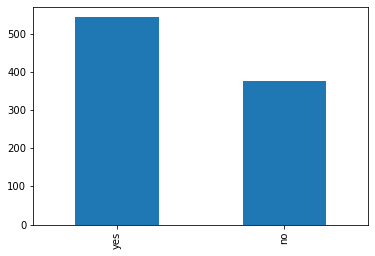

In [16]:
theydies_fn_list = ["4_18/theydies_4_18.csv", "4_19/theydies_4_19.csv", "4_20/theydies_4_20.csv", "4_21/theydies_4_21.csv", "4_22/theydies_4_22.csv", "4_24/theydies_4_24.csv", "11_2/theydies_11_2.csv", "11_4/theydies_11_4.csv", "11_9/theydies_11_9.csv", "11_18/theydies_11_18.csv"]
theydies_df_list = [pd.read_csv(fn) for fn in theydies_fn_list]
theydies_df = pd.concat(theydies_df_list).reset_index(drop=True)

theydies_df['pronouns'] = ['no' if x >= 6 else 'yes' for x in np.sum(theydies_df.values == 'no', 1)]
print(theydies_df['pronouns'].value_counts()/theydies_df['pronouns'].value_counts().sum())
theydies_df['pronouns'].value_counts().plot.bar()

no     0.845805
yes    0.154195
Name: pronouns, dtype: float64


<AxesSubplot:>

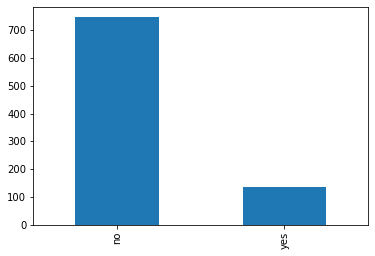

In [17]:
ladies_fn_list = ["4_19/ladies_4_19.csv", "4_20/ladies_4_20.csv", "4_21/ladies_4_21.csv", "4_22/ladies_4_22.csv", "4_24/ladies_4_24.csv", "11_2/ladies_11_2.csv", "11_4/ladies_11_4.csv", "11_9/ladies_11_9.csv", "11_18/ladies_11_18.csv"]
ladies_df_list = [pd.read_csv(fn) for fn in ladies_fn_list]
ladies_df = pd.concat(ladies_df_list).reset_index(drop=True)

ladies_df['pronouns'] = ['no' if x >= 6 else 'yes' for x in np.sum(ladies_df.values == 'no', 1)]
ladies_counts = ladies_df['pronouns'].value_counts()
print(ladies_counts/ladies_counts.sum())
ladies_df['pronouns'].value_counts().plot.bar()

Overall, what we can tell from this is that words with specific gender morphemes tend to appeal more to people who reside within communities where it is the norm to indicate your pronouns to be more inclusive. This is cool! Since my next question is wondering who people are referring to when tweeting, let's look at some of the other popular words that are being tweeted with the query.

There are 129645 words in this query.


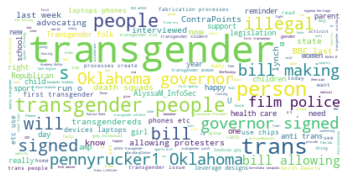

In [41]:
text = " ".join(tweet for tweet in transgender_df.tweet)
print ("There are {} words in this query.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["t", "co", "https", "RT"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Seems like there's a lot of words that are related that are somewhat political and talking about, since "people" is a popular one, as well as "transgender people". Maybe, though, "trans" is being used in reference to themselves.

There are 106308 words in this query.


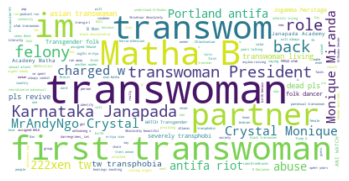

In [43]:
text = " ".join(tweet for tweet in transwoman_df.tweet)
print ("There are {} words in this query.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["t", "co", "https", "RT", "4JNs49hPr9"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 37322 words in this query.


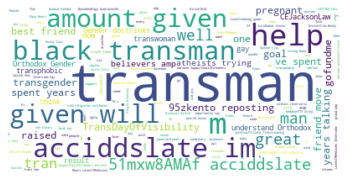

In [42]:
text = " ".join(tweet for tweet in transman_df.tweet)
print ("There are {} words in this query.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["t", "co", "https", "RT", "4JNs49hPr9"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Not quite sure why, but there are random codes that show up in the words? Maybe they are someone's username?

There are 55565 words in this query.


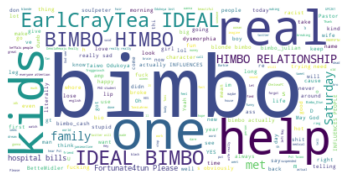

In [44]:
text = " ".join(tweet for tweet in bimbo_df.tweet)
print ("There are {} words in this query.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["t", "co", "https", "RT", "4JNs49hPr9"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 84671 words in this query.


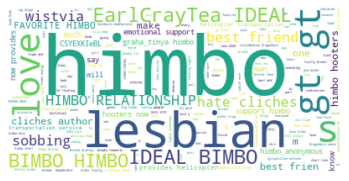

In [45]:
text = " ".join(tweet for tweet in himbo_df.tweet)
print ("There are {} words in this query.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["t", "co", "https", "RT", "4JNs49hPr9"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

"himbo lesbian love" is my favorite grouping of words so far.

There are 88705 words in this query.


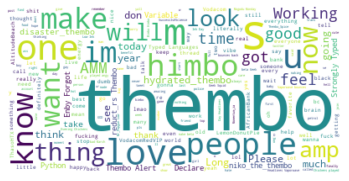

In [52]:
text = " ".join(tweet for tweet in thembo_df.tweet)
print ("There are {} words in this query.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["t", "co", "https", "RT"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 90606 words in this query.


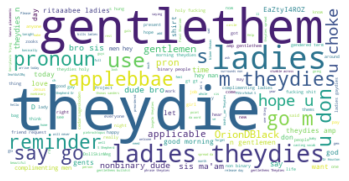

In [47]:
text = " ".join(tweet for tweet in theydies_df.tweet)
print ("There are {} words in this query.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["t", "co", "https", "RT", "4JNs49hPr9"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It's very interesting that gentlethem is also popular in a query with theydies, and a little less surprising that ladies is also popular alongside it.

There are 97909 words in this query.


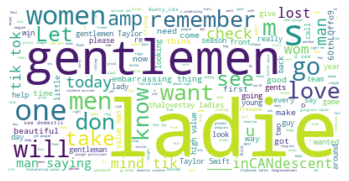

In [48]:
text = " ".join(tweet for tweet in ladies_df.tweet)
print ("There are {} words in this query.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["t", "co", "https", "RT", "4JNs49hPr9"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 96490 words in this query.


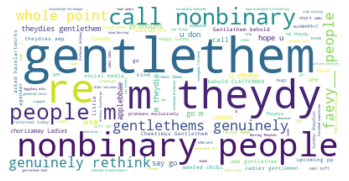

In [49]:
text = " ".join(tweet for tweet in gentlethem_df.tweet)
print ("There are {} words in this query.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["t", "co", "https", "RT", "4JNs49hPr9"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Interesting, I have seen this spelling of "theydy" a few times, but not that much. I also think it's interesting that nonbinary people shows up in this query, perhaps many of these tweets are talking about other people.

There are 102837 words in this query.


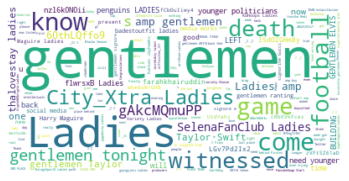

In [50]:
text = " ".join(tweet for tweet in gentlemen_df.tweet)
print ("There are {} words in this query.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["t", "co", "https", "RT", "4JNs49hPr9"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

I was thinking of possibly also doing a frequency distribution for each of these, but I think this is pretty interesting too. It has given me some sort of inspiration as I go forward and definitely wanting to do some n-grams.

The next steps for this project is to look at some statistical tests, likely chi-squared and t-tests to compare the proportions of different pronoun users to determine the significance. After that, it'll be time to do some hardcore NLP! My theory right now is to use n-grams to determine who users are referring to when they use "thembo", "bimbo", etc and then some sentiment analysis to see if there is a general disatisfaction with the words or if it is typically happy and they enjoy using those words.